<a href="https://colab.research.google.com/github/rpdahxn/GenerativeDeepLearning/blob/main/02_01_deep_learning_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.3.1 데이터 적재

In [2]:
!pip install keras.utils 

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=3b38010215d5b6a541b4b39b63a2150673e9583245ff95df92ffe4d06d76639c
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

# 신경망은 입력이 -1과 1사이 범위에 놓여 있을 때 가장 잘 동작한다.
x_train = x_train.astype('float32') / 255.0  # [50000, 32, 32, 3]
x_test = x_test.astype('float32') / 255.0  # [10000, 32, 32, 3]

y_train = to_categorical(y_train, NUM_CLASSES)  # [50000, 1]에서 원-핫 인코딩을 통해 [50000, 10]
y_test = to_categorical(y_test, NUM_CLASSES)  # [10000, 1]에서 [10000, 1]로

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
# 인덱스 54의 이미지에서 (12, 13) 위치에 해당하는 픽셀의 초록 채널(1)의 값
x_train[54, 12, 13, 1]

0.36862746

### 2.3.2 모델 만들기
Sequential 모델

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
Dense(200, activation = 'relu', input_shape = (32, 32, 3)),
Flatten(),
Dense(150, activation = 'relu'),
Dense(10, activation = 'softmax')
])

함수형 API를 사용한 네트워크

In [6]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape = (32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units = 10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()로 각 층의 크기를 확인한다.

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               614600    
                                                                 
 dense_7 (Dense)             (None, 150)               30150     
                                                                 
 dense_8 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


### 2.3.3 모델 컴파일

In [9]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr = 0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt,
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 2.3.4 모델 훈련

In [10]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)
# batch_size = 훈련 스텝마다 네트워크에 전달될 샘플의 개수
# shuffle = True면 훈련 스텝마다 배치를 훈련 데이터에서 중복을 허용하지 않고 랜덤하게 추출

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8518 - accuracy: 0.3330
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6679 - accuracy: 0.4032
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5813 - accuracy: 0.4374
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5298 - accuracy: 0.4560
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4905 - accuracy: 0.4685
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4630 - accuracy: 0.4778
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4340 - accuracy: 0.4903
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4142 - accuracy: 0.4970
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3951 - accuracy: 0.5036
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

### 2.3.5 모델 평가

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4285 - accuracy: 0.4979


[1.42853581905365, 0.49790000915527344]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]  # axis = -1은 마지막 차원으로 배열을 압축하라는 뜻
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

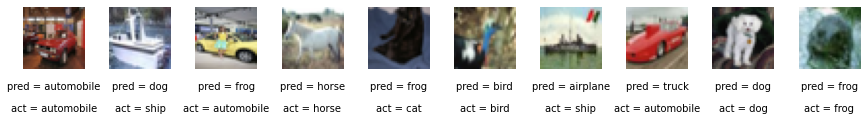

In [13]:
import matplotlib.pyplot as plt 

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)